# Example: Multi-metric runs
----------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

In [2]:
# Load data
X = pd.read_csv("./datasets/abalone.csv")

# Let's have a look
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Run the pipeline

In [3]:
atom = ATOMRegressor(X, n_jobs=1, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (4177, 9)
Memory: 509.72 kB
Scaled: False
Categorical features: 1 (12.5%)
Outlier values: 187 (0.6%)
-------------------------------------
Train set size: 3342
Test set size: 835



In [4]:
atom.encode()

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 classes.


In [5]:
# For every step of the BO, both metrics are calculated,
# but only the first is used for optimization!
atom.run(
    models=["lsvm", "hGBM"],
    metric=("r2", "rmse"),
    n_trials=10,
    n_bootstrap=6,
)


Training ========================= >>
Models: lSVM, hGBM
Metric: r2, neg_root_mean_squared_error


Running hyperparameter tuning for LinearSVM...
| trial |                    loss |       C |    dual |      r2 | best_r2 | neg_root_mean_squared_error | best_neg_root_mean_squared_error | time_trial | time_ht |    state |
| ----- | ----------------------- | ------- | ------- | ------- | ------- | --------------------------- | -------------------------------- | ---------- | ------- | -------- |
| 0     | squared_epsilon_insen.. |   0.001 |    True |  0.2009 |  0.2009 |                      -2.971 |                           -2.971 |     0.034s |  0.034s | COMPLETE |
| 1     | squared_epsilon_insen.. |  0.0534 |   False |  0.5072 |  0.5072 |                     -2.4603 |                          -2.4603 |     0.031s |  0.065s | COMPLETE |
| 2     | squared_epsilon_insen.. |  0.0105 |    True |  0.3288 |  0.5072 |                     -2.5318 |                          -2.4603 |     0.034s |

In [6]:
# Check the robustness of the pipeline using cross-validation
atom.winner.cross_validate()

Applying cross-validation...


,train_r2,test_r2,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error,time (s)
0,0.569346,0.529549,-2.105422,-2.252907,0.630262
1,0.582883,0.539625,-2.067226,-2.247968,0.610330
2,0.590722,0.521151,-2.056534,-2.255911,0.628156
3,0.580804,0.562349,-2.102992,-2.067051,0.619890
4,0.587709,0.492538,-2.084716,-2.229899,0.612518
mean,0.582293,0.529042,-2.083378,-2.210747,0.620231
std,0.007356,0.022875,0.019256,0.072413,0.008013


## Analyze the results

In [7]:
# The columns in the results dataframe contain a list of
# scores, one for each metric (in the same order as called)
atom.results[["score_ht", "score_train", "score_test"]]

,score_ht,score_train,score_test
lSVM,"[0.5468955047338504, -2.265420247703106]","[0.4648, -2.3752]","[0.4328, -2.3574]"
hGBM,"[0.5509021456694858, -2.0709221111339886]","[0.5877, -2.0847]","[0.4925, -2.2299]"


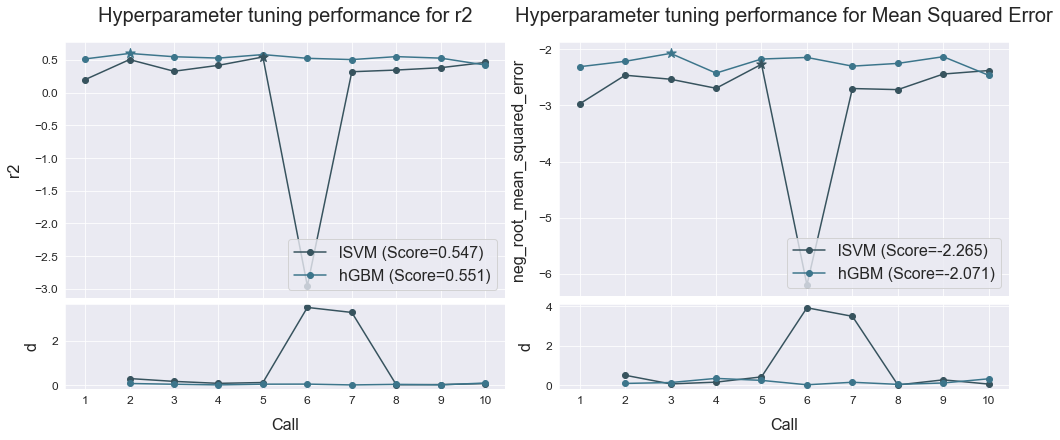

In [8]:
# Some plots allow us to choose the metric we want to show
with atom.canvas():
    atom.plot_trials(metric="r2", title="Hyperparameter tuning performance for R2")
    atom.plot_trials(metric="rmse", title="Hyperparameter tuning performance for RMSE")

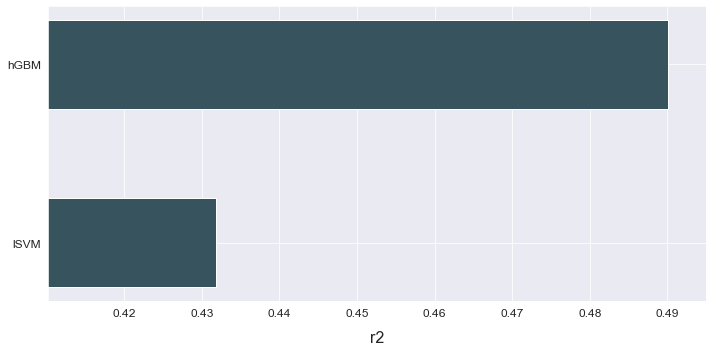

In [10]:
atom.plot_results(metric="r2")
